<a href="https://colab.research.google.com/github/vilsonrodrigues/COVID19/blob/master/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Link dataset brasileiro: "https://www.kaggle.com/unanimad/corona-virus-brazil "

No mundo: "https://ourworldindata.org/coronavirus-source-data"
**

Importando Libs

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
import datetime as dt

In [0]:
dataset_brazil = pd.read_csv("https://raw.githubusercontent.com/vilsonrodrigues/COVID19/master/brazil_covid19.csv")
dataset_brazil.head()

,date,hour,state,suspects,refuses,cases
0,2020-01-30,16:00,Minas Gerais,1,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0
3,2020-01-30,16:00,São Paulo,3,1,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0


,date,hour,state,suspects,refuses,cases
0,2020-01-30,16:00,Minas Gerais,1,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0
3,2020-01-30,16:00,São Paulo,3,1,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0


In [0]:
dataset_brazil = dataset_brazil.sort_values("state")
dataset_brazil

,date,hour,state,suspects,refuses,cases
455,2020-03-10,16:05,Acre,3,0,0
577,2020-03-15,19:15,Acre,3,0,0
527,2020-03-13,15:45,Acre,3,0,0
503,2020-03-12,16:20,Acre,3,0,0
479,2020-03-11,16:45,Acre,3,0,0
...,...,...,...,...,...,...
17,2020-02-01,12:00,São Paulo,8,2,0
609,2020-03-16,15:50,Tocantins,3,0,0
555,2020-03-14,16:25,Tocantins,2,0,0
582,2020-03-15,19:15,Tocantins,3,0,0


In [0]:
data = dataset_brazil.groupby(["date"])[["suspects","refuses","cases"]].sum().reset_index()
data

,date,suspects,refuses,cases
0,2020-01-30,9,6,0
1,2020-01-31,13,9,0
2,2020-02-01,16,10,0
3,2020-02-02,16,10,0
4,2020-02-03,14,13,0
5,2020-02-04,13,16,0
6,2020-02-05,11,21,0
7,2020-02-06,18,48,0
8,2020-02-07,8,26,0
9,2020-02-08,8,28,0


Acumulando dados por dia

In [0]:
data["suspeitas_acumuladas"] = data["suspects"].cumsum()
data["casos_confirmados_acumulados"] = data["cases"].cumsum()
data["negados_acumulados"] = data["refuses"].cumsum()

Gerando dias acumulados

In [0]:
data["index"] = pd.RangeIndex(1,47)

In [0]:
data

,date,suspects,refuses,cases,suspeitas_acumuladas,casos_confirmados_acumulados,negados_acumulados,index
0,2020-01-30,9,6,0,9,0,6,1
1,2020-01-31,13,9,0,22,0,15,2
2,2020-02-01,16,10,0,38,0,25,3
3,2020-02-02,16,10,0,54,0,35,4
4,2020-02-03,14,13,0,68,0,48,5
5,2020-02-04,13,16,0,81,0,64,6
6,2020-02-05,11,21,0,92,0,85,7
7,2020-02-06,18,48,0,110,0,133,8
8,2020-02-07,8,26,0,118,0,159,9
9,2020-02-08,8,28,0,126,0,187,10


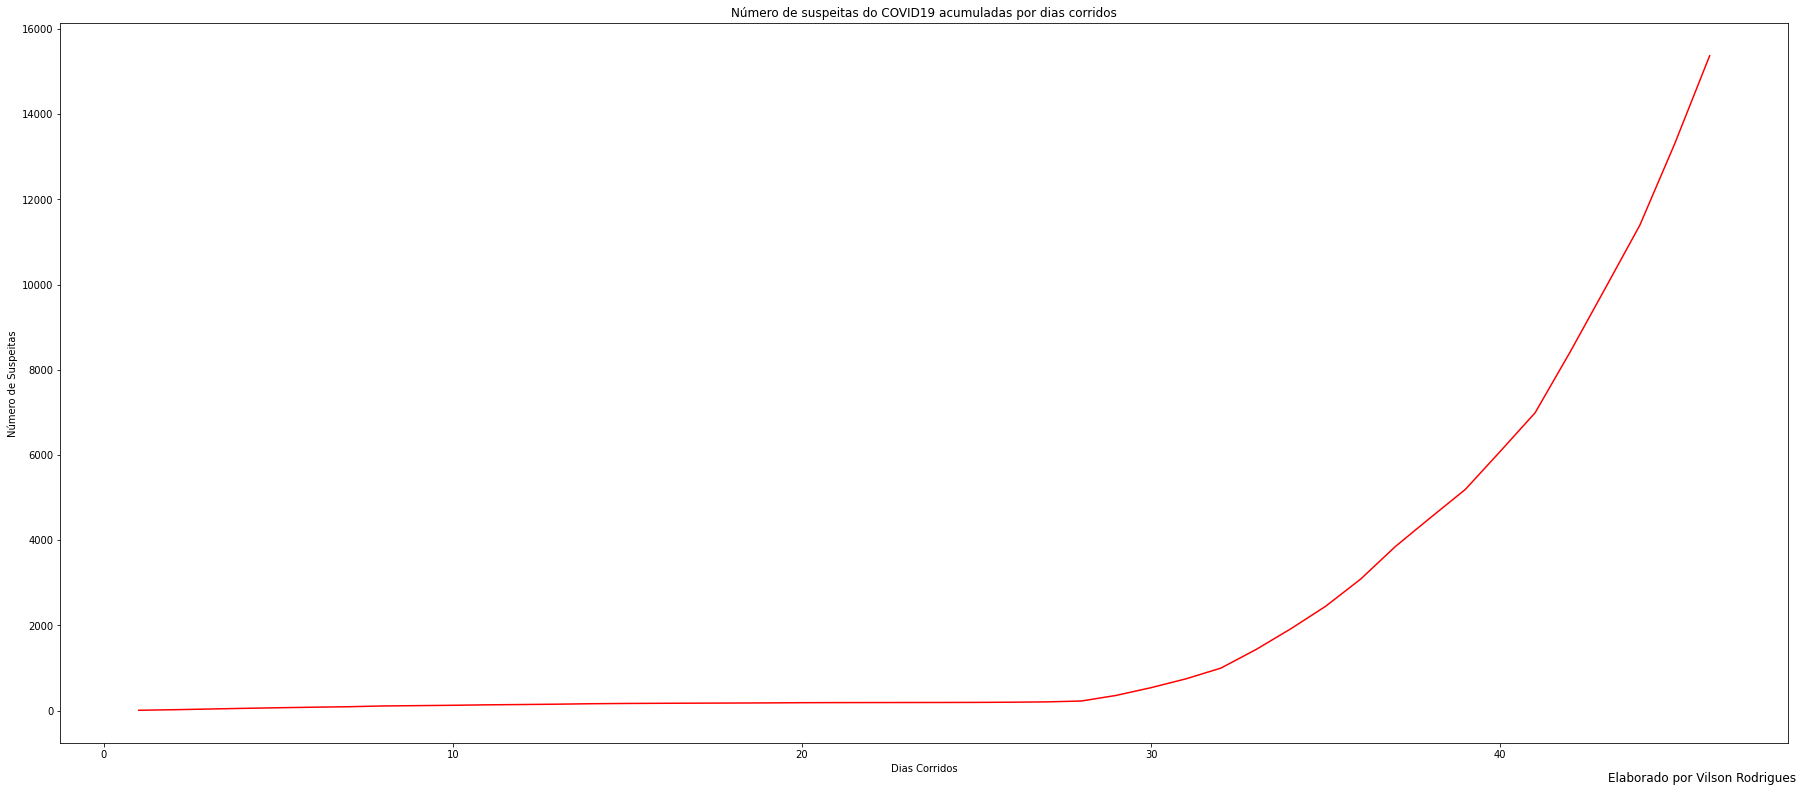

<Figure size 432x288 with 0 Axes>

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,4.0,2.5])#[left, bottom, width, height]
axes.plot("index","suspeitas_acumuladas",data=data,c="r")
#Titulo
plt.title("Número de suspeitas do COVID19 acumuladas por dias corridos")
plt.suptitle("Elaborado por Vilson Rodrigues",x=3.9,y=0)
#Eixos
plt.xlabel("Dias Corridos")
plt.ylabel("Número de Suspeitas")
plt.show()
plt.savefig("figura1.jpg",dpi=1000)

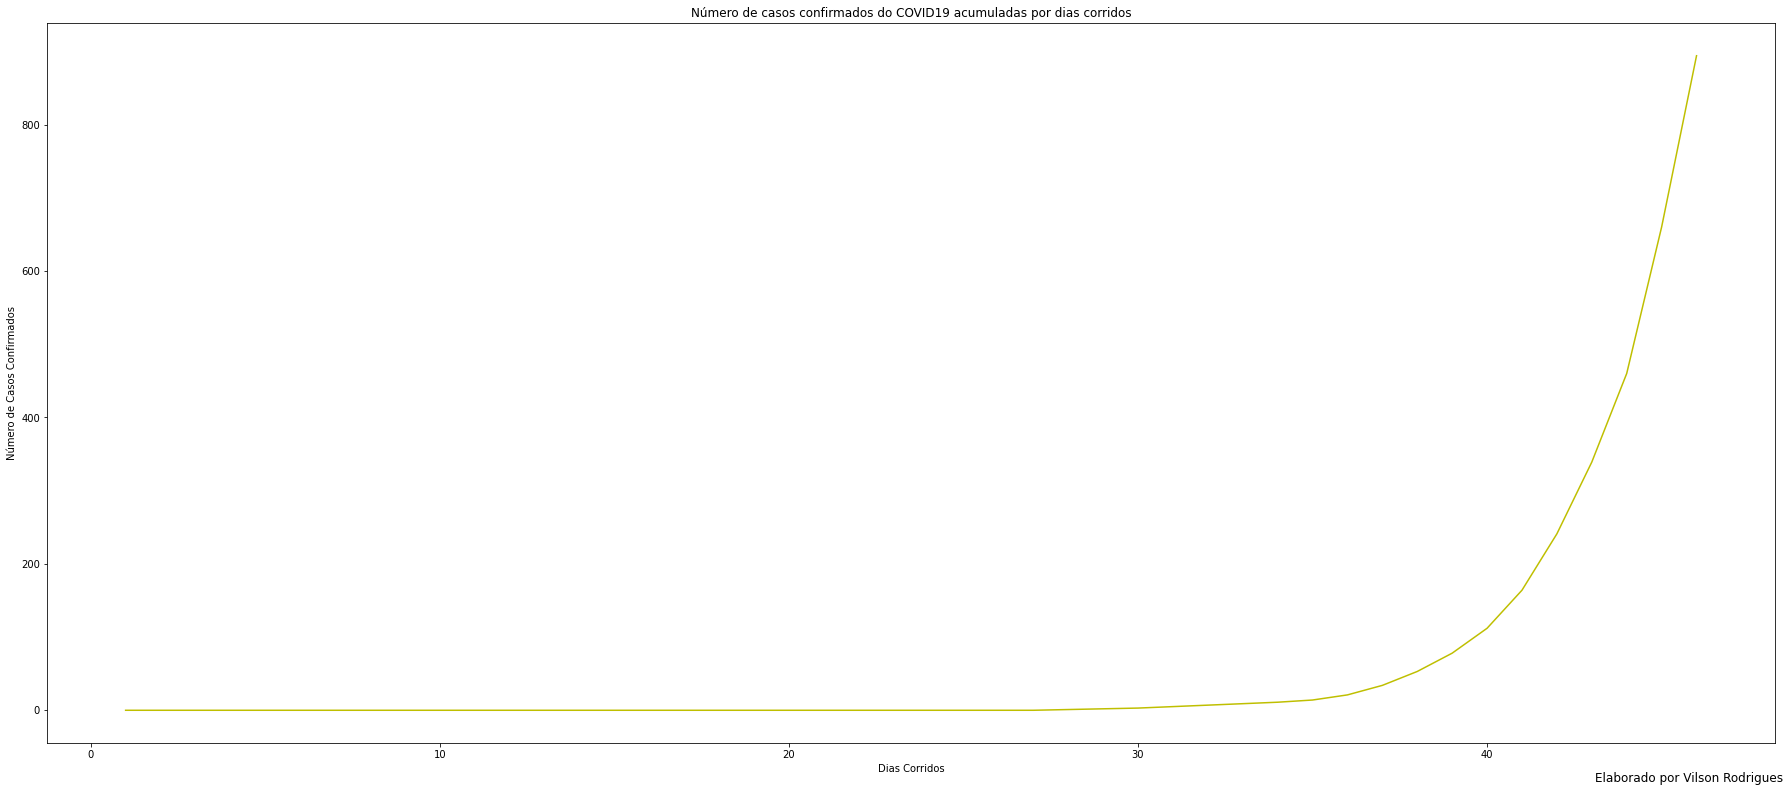

<Figure size 432x288 with 0 Axes>

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,4.0,2.5])#[left, bottom, width, height]
axes.plot("index","casos_confirmados_acumulados",data=data,c="y")
#Titulo
plt.title("Número de casos confirmados do COVID19 acumuladas por dias corridos")
plt.suptitle("Elaborado por Vilson Rodrigues",x=3.9,y=0)
#Eixos
plt.xlabel("Dias Corridos")
plt.ylabel("Número de Casos Confirmados")
plt.show()
plt.savefig("figura2.jpg",dpi=1000)

Fazendo anotações

In [0]:
fig, ax = plt.subplots()
ax.bar(x, y)
ax.annotate("Maior valor", 
            xy=(10, 12),
            xycoords='data',
            xytext=(11, 10),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.show()

In [0]:
data = dataset_brazil.groupby(["state"])[["suspects","refuses","cases"]].sum().reset_index()
data

In [0]:
data["total"] = data["suspects"] + data["refuses"] + data["cases"]

In [0]:
labels = ["Suspeitos","Negados","Confirmados","Total"]
#labels = ["Suspeitos","Confirmados"]
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,4.0,2.5])#[left, bottom, width, height]
axes.stackplot("state","suspects","refuses","cases","total",data=data, labels=labels)
axes.legend(loc="upper left")
plt.show()
#plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels



In [0]:
labels = ["Suspeitos","Total"]
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,4.0,2.5])#[left, bottom, width, height]
axes.stackplot("state","suspects","total",data=data, labels=labels)
axes.legend(loc="upper left")
plt.show()

In [0]:
labels = ["Confirmados","Total"]
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,4.0,2.5])#[left, bottom, width, height]
axes.stackplot("state","cases","total",data=data, labels=labels)
axes.legend(loc="upper left")
plt.show()

In [0]:
labels = ["Negados","Total"]
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,4.0,2.5])#[left, bottom, width, height]
axes.stackplot("state","refuses","total",data=data, labels=labels)
axes.legend(loc="upper left")
plt.show()

In [0]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,4.0,2.5])#[left, bottom, width, height]
axes.bar("state","suspects",data=data,color="y")
axes.set_xlabel("Estado")
axes.set_ylabel("Número de suspeitos")
#plt.xticks(dataset_brazil["suspects"], rotation="vertical")
plt.show()

In [0]:
dataset_brazil = pd.read_csv("brasil.csv", sep=";")

In [0]:
dataset_brazil.head()

In [0]:
dataset_brazil